In [1]:
import scipy
import numpy as np
import matplotlib
%matplotlib inline
%pylab inline 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import pandas as pd

from matplotlib.colors import ListedColormap
import sklearn
import sklearn.decomposition
import sklearn.neighbors
import sklearn.datasets

cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

Populating the interactive namespace from numpy and matplotlib


In [47]:
dir1='train.csv'
train=pd.read_csv(dir1)

In [48]:
df=train
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
x=df[df.columns[1:]]
y=df['label']

In [50]:
x=np.asarray(x)

In [51]:
x.shape

(42000, 784)

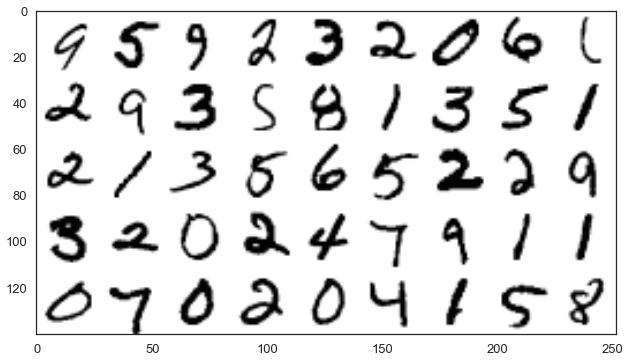

In [8]:
randomized_data = np.random.permutation(x)
rows = 5
cols = 10
img = []

for col in xrange(rows, rows*cols, rows):
    examples = randomized_data[col-rows:col,:]
    col_img = np.reshape(examples,(28*rows,28))
    img.append(col_img)

plt.imshow(np.hstack(img))
plt.show()

In [52]:
svd = sklearn.decomposition.TruncatedSVD(n_components=28)
x = x - np.mean(x, axis=0)
foo = svd.fit(x)
x_2d = foo.transform(x)

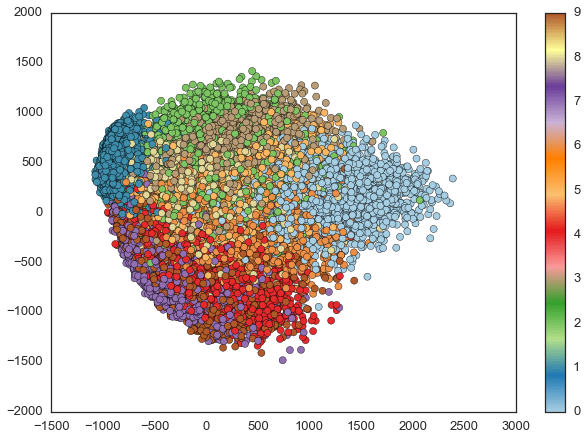

In [11]:
plt.scatter(x_2d[:,0], x_2d[:,1], c=y, s = 50, cmap=plt.cm.Paired)
plt.colorbar()
plt.show()

In [53]:
x_train,x_val,y_train,y_val=sklearn.cross_validation.train_test_split(x_2d,y,test_size=0.33,random_state=42)

In [54]:
print x_train.shape, x_val.shape, y_train.shape, y_val.shape

(28140, 28) (13860, 28) (28140,) (13860,)


In [15]:
def k_nn(x_train,y_train,x_val,y_val,k):
    knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_hat=knn.predict(x_val)
    return y_hat

def show_confusion_matrix(confusion_matrix):
    plt.matshow(confusion_matrix, cmap=plt.cm.Greys_r)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

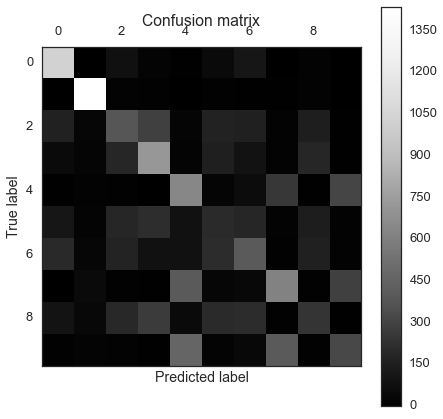

In [45]:
cm=sklearn.metrics.confusion_matrix(y_val,y_hat)
show_confusion_matrix(cm)

In [57]:
k_list=np.arange(1,10,1)
acc=[]

for k in k_list:
    acc.append(sklearn.metrics.accuracy_score(y_val,k_nn(x_train,y_train,x_val,y_val,k)))

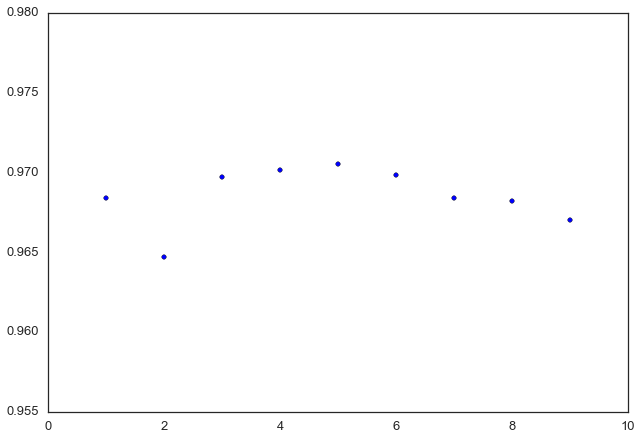

In [58]:
plt.scatter(k_list,acc)
plt.show()

In [59]:
acc.index(max(acc))
max(acc)

0.97049062049062051

In [60]:
kbest=k_list[acc.index(max(acc))]
kbest

5

In [61]:
knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=kbest)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [62]:
dir2='test.csv'
test=pd.read_csv(dir2)

In [63]:
df=test
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x_test=np.asarray(df)

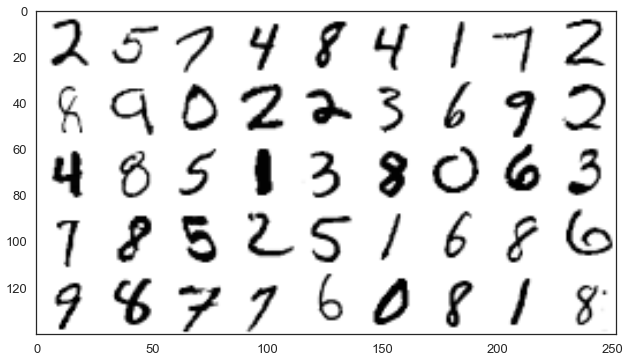

In [68]:
randomized_data = np.random.permutation(x_test)
rows = 5
cols = 10
img = []

for col in xrange(rows, rows*cols, rows):
    examples = randomized_data[col-rows:col,:]
    col_img = np.reshape(examples,(28*rows,28))
    img.append(col_img)

plt.imshow(np.hstack(img))
plt.show()

In [65]:
svd = sklearn.decomposition.TruncatedSVD(n_components=28)
x_test = x_test - np.mean(x_test, axis=0)
foo = svd.fit(x_test)
x_test_2d = foo.transform(x_test)

In [66]:
result=knn.predict(x_test_2d)

In [70]:
result_print=pd.DataFrame(result).reset_index()
result_print.columns=[['ImageId','Label']]
result_print['ImageId']=result_print['ImageId']+1
result_print.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,6
4,5,3


In [69]:
result_print.to_csv('dr_knn_28.csv',header=True,index=False)